In [1]:
!pip install transformers -q
!pip install sentencepiece -q

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 636 kB 41.0 MB/s 
     |████████████████████████████████| 3.3 MB 42.5 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 895 kB 40.1 MB/s 
     |████████████████████████████████| 109 kB 34.1 MB/s 
     |████████████████████████████████| 546 kB 52.5 MB/s 
     |████████████████████████████████| 1.2 MB 5.3 MB/s 


In [2]:
import pandas as pd

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')

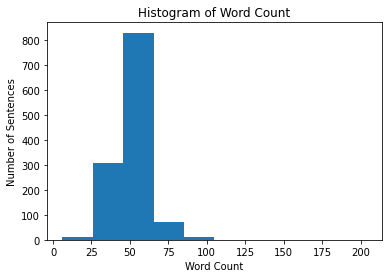

In [4]:
plot_histogram(data['Lyric'])

##### From the histogram, it is evident that most of the sentences have 50 words and some have 75. Although there are sentences with 100 words, the perecentage is very minimal. Hence maximum sequence length is considered as 75.

In [5]:
MAX_SEQ_LEN = 75
gpu, cpu = get_devices()

In [6]:
chk_point = 'google/muril-base-cased'
base_model, tokenizer = load_bert_model(chk_point)

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/909M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/muril-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/181 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/113 [00:00<?, ?B/s]

In [7]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=MAX_SEQ_LEN)

In [13]:
txt_results = k_fold_model_preparation(base_model, gpu, data, sequences, attention_masks, targets, fusion=False,
                                       k_folds=2, epochs=15, balance_classes=True, dropout_level=0.25, lr=5e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=4, clip_at=1.0)

Running Text Only Classification
FOLD 0
--------------------------------
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 15
Training Model
Evaluating
Losses - Train : 0.694 / Validation : 0.693
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Evaluating
Losses - Train : 0.695 / Validation : 0.693
Epoch 3 / 15
Training Model
Evaluating
Losses - Train : 0.694 / Validation : 0.693
Epoch 4 / 15
Training Model
Evaluating
Losses - Train : 0.699 / Validation : 0.532
Epoch 5 / 15
Training Model
Evaluating
Losses - Train : 0.778 / Validation : 0.710
Epoch 6 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating
Losses - Train : 0.701 / Validation : 0.693
Epoch 7 / 15
Training Model
Evaluating
Losses - Train : 0.693 / Validation : 0.693
Epoch 8 / 15
Training Model
Evaluating
Losses - Train : 0.693 / Validation : 0.691
Epoch 9 / 15
Training Model
Evaluating
Losses - Train : 0.726 / Validation : 0.800
Epoch 10 / 15
Training Model
Evaluating
Losses - Train : 0.700 / Validation : 0.693
Epoch 11 / 15
Training Model
Evaluating
Losses - Train : 0.689 / Validation : 0.616
Epoch 12 / 15
Training Model
Evaluating
Losses - Train : 0.692 / Validation : 0.693
Epoch 13 / 15
Training Model
Evaluating
Losses - Train : 0.694 / Validation : 0.693
Epoch 14 / 15
Training Model
Evaluating
Losses - Train : 0.693 / Validation : 0.693
Epoch 15 / 15
Training Model
Evaluating
Losses - Train : 0.693 / Validation : 0.693
On Train Data
              precision    recall  f1-score   support

           0       0.50      0.06      0.11       198
           1       0.69      0.97      0.80       418

    accuracy  

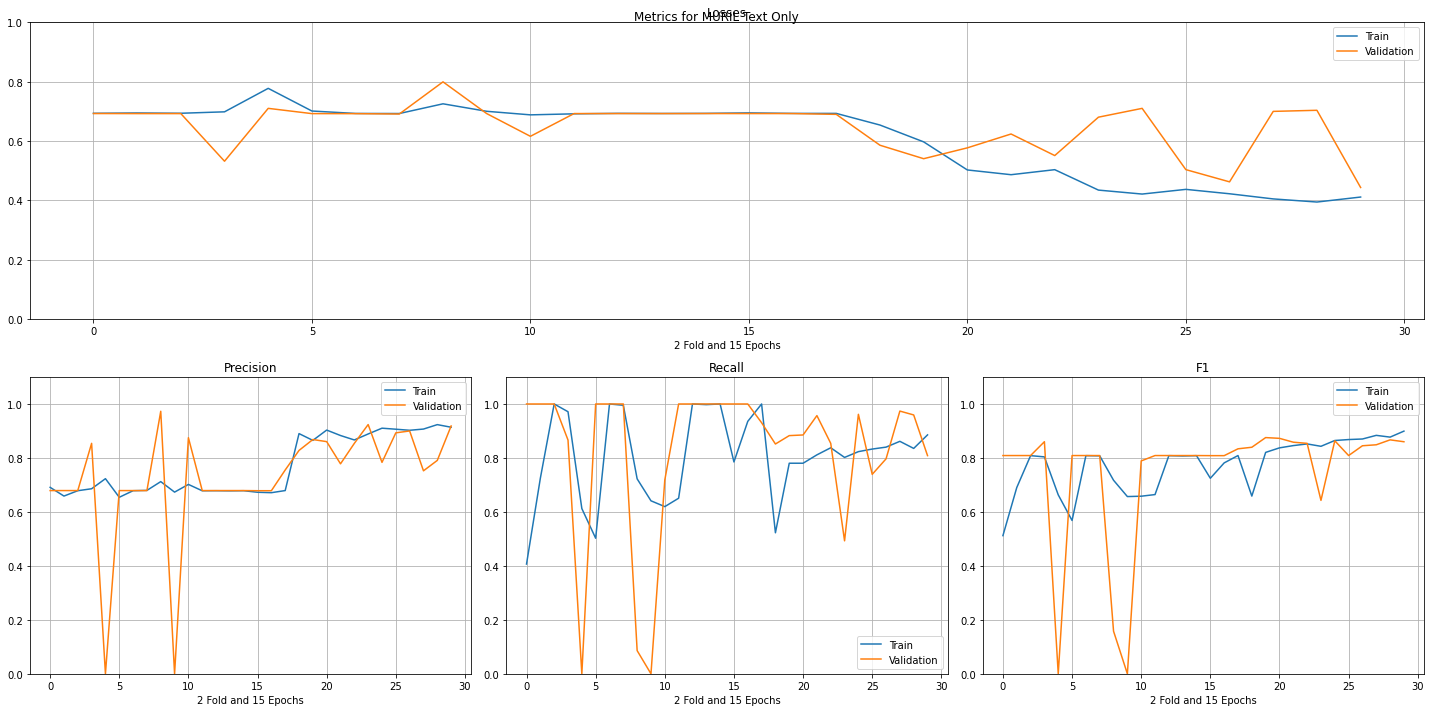

In [14]:
plot_results(txt_results,'MURIL Text Only')

In [15]:
fusion_results = k_fold_model_preparation(base_model, gpu, data, sequences, attention_masks, targets, fusion=True,
                                       k_folds=2, epochs=15, balance_classes=True, dropout_level=0.25, lr=5e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=4, clip_at=1.0)

Running Fusion Model
FOLD 0
--------------------------------
Class Weights : [1.55555556 0.73684211]
Epoch 1 / 15
Training Model
Evaluating
Losses - Train : 0.692 / Validation : 0.691
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Evaluating
Losses - Train : 0.690 / Validation : 0.690
Epoch 3 / 15
Training Model
Evaluating
Losses - Train : 0.689 / Validation : 0.689
Epoch 4 / 15
Training Model
Evaluating
Losses - Train : 0.687 / Validation : 0.689
Epoch 5 / 15
Training Model
Evaluating
Losses - Train : 0.686 / Validation : 0.688
Epoch 6 / 15
Training Model
Evaluating
Losses - Train : 0.687 / Validation : 0.688
Epoch 7 / 15
Training Model
Evaluating
Losses - Train : 0.688 / Validation : 0.688
Epoch 8 / 15
Training Model
Evaluating
Losses - Train : 0.684 / Validation : 0.652
Epoch 9 / 15
Training Model
Evaluating
Losses - Train : 0.682 / Validation : 0.690
Epoch 10 / 15
Training Model
Evaluating
Losses - Train : 0.687 / Validation : 0.686
Epoch 11 / 15
Training Model
Evaluating
Losses - Train : 0.687 / Validation : 0.686
Epoch 12 / 15
Training Model
Evaluating
Losses - Train : 0.685 / Validation : 0.690
Epoch 13 / 15
Training Model
Evaluating
Losses - Train : 0.686 / Validation : 0.688
Epoch 14 / 15
Training Model

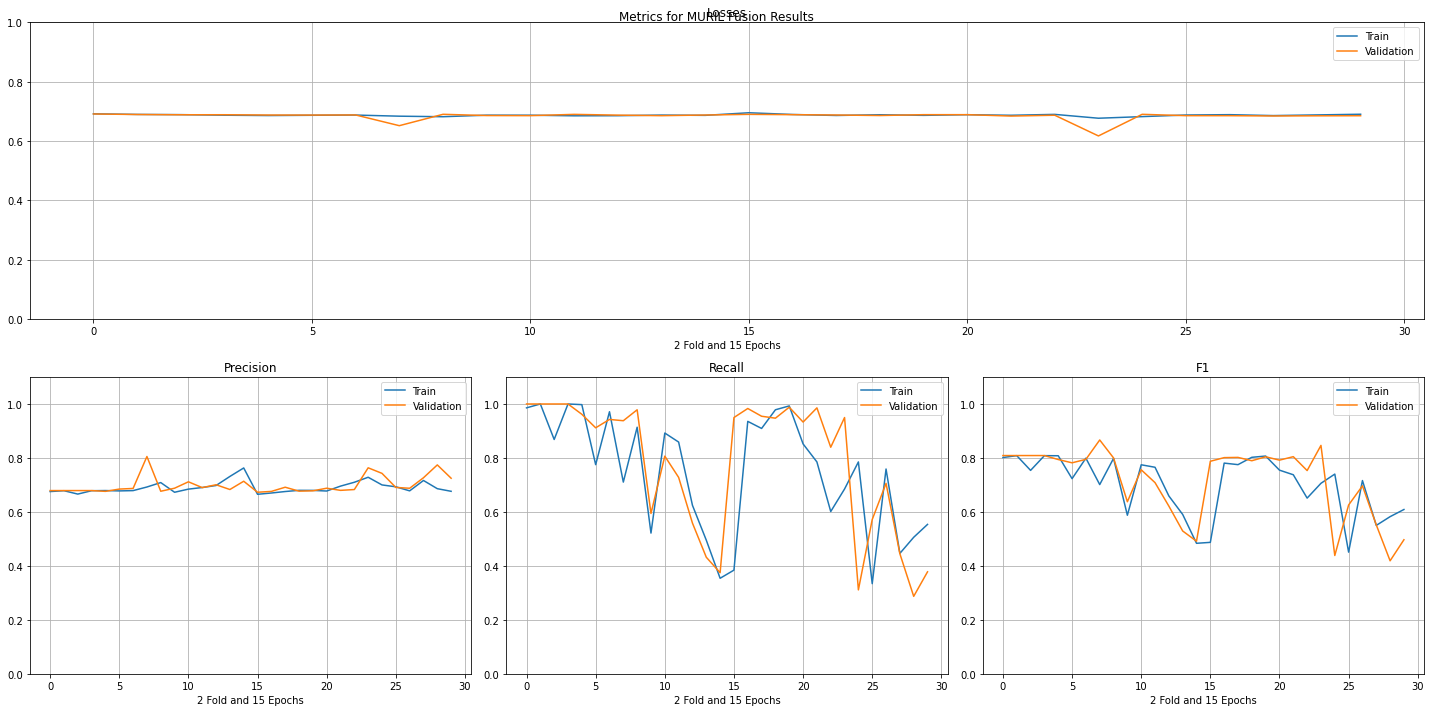

In [16]:
plot_results(fusion_results,'MURIL Fusion Results')